import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression


Dataset read and preprocessing

In [3]:
dataset=pd.read_csv('abalone.csv')
dataset

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# don't need first index('id') and index "Rings" -> label
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values



In [5]:
print(x)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [6]:
print(y)

[15  7  9 ...  9 10 12]


In [7]:
# index "Sex" need to Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 ... 0.2245 0.101 0.15]
 [0.0 0.0 1.0 ... 0.0995 0.0485 0.07]
 [1.0 0.0 0.0 ... 0.2565 0.1415 0.21]
 ...
 [0.0 0.0 1.0 ... 0.5255 0.2875 0.308]
 [1.0 0.0 0.0 ... 0.531 0.261 0.296]
 [0.0 0.0 1.0 ... 0.9455 0.3765 0.495]]


In [8]:
print(x.shape)

(4177, 10)


In [9]:
# split test and train set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=12)

Logistic Regression

In [22]:
lr=LogisticRegression(random_state=0,max_iter=500)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [23]:
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- Logistic Regression Classifier ---
0.25478468899521534
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 22  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23 19  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 30 24 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 18 39 32 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 40 53 32  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7 16 47 45 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  7 29 39 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4 13 16 10  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5 18 14  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 12  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5 11  4  0  0  0  0

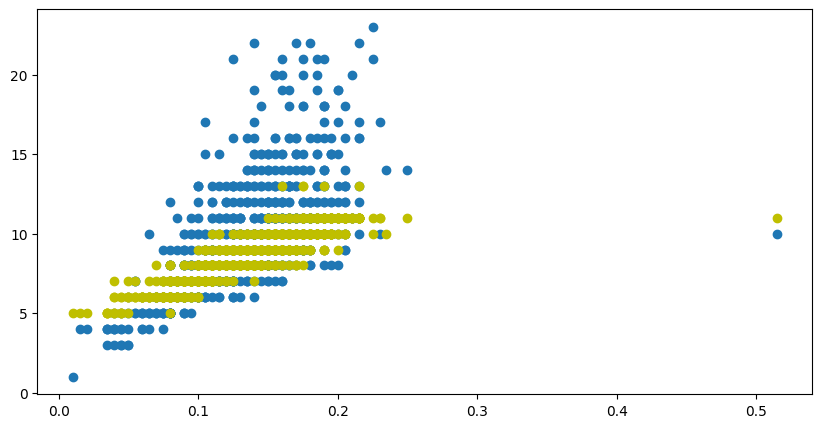

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Decision Tree Classification

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [28]:
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- Decision Tree Classifier ---
0.20095693779904306
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  7  9  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  3 17 12 11  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 17 22 20  7  5  1  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  6 16 21 20 21 13  3  3  1  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  3 10 30 30 24 20  9  5  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  2  6 13 32 26 16  5  5  3 11  2  2  1  0  0  0  0  2]
 [ 0  0  0  0  2  2  5 18 19 24 11  9  4  3  1  1  0  1  0  0  0  1]
 [ 0  0  0  0  1  1  2  6 10  7  5  5  1  2  0  2  2  0  0  1  0  2]
 [ 0  0  0  0  0  1  5  4  7  7  6  4  4  1  1  2  1  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  5  4  1  2  0  1  1  3  0  0  2  1  0  0  0]
 [ 0  0  0  0  0  1  0  4  2  3  3  1  3  2  1  2

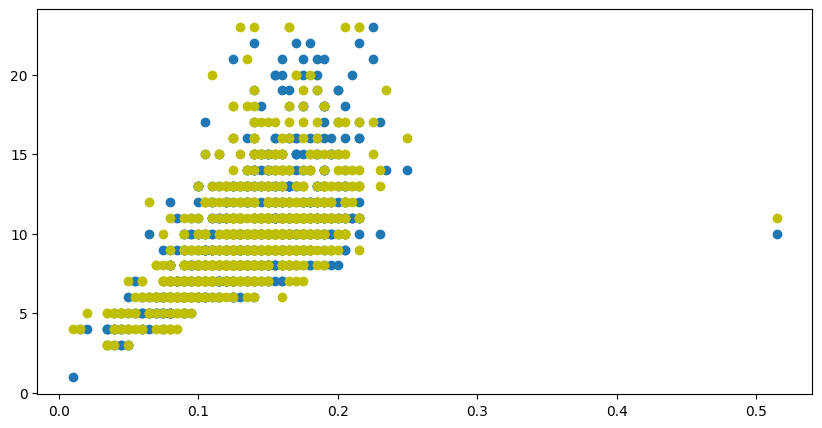

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Random Forest Classifiaction

In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [30]:
print ("\n--- Random Forest Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- Random Forest Classifier ---
0.25239234449760767
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  8 11  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 15 22  5  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 16 20 24  5  5  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  3 14 42 33  9  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 11 34 41 31 12  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5 19 22 43 26  7  1  0  1  1  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  9 24 27 26 11  0  2  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4 11 11  8  5  2  1  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  8 10 10  4  3  1  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5  8  3  0  0  0  2  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  4  6  3  1  3  3  0  0  0

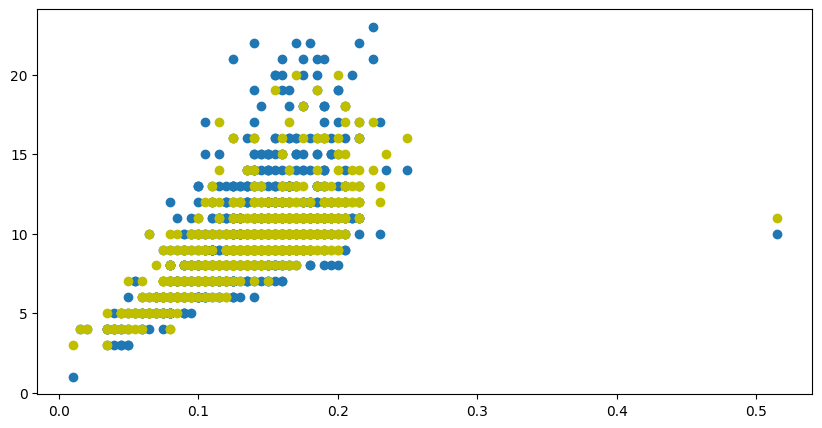

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Support Vector Machine Classification

In [33]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [34]:
print ("\n--- SVM Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- SVM Classifier ---
0.24880382775119617
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  2  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22 16  4 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13 22 20 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 16 34 43 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 30 68 31  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 12 64 37 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 39 30 24  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 20 12  9  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3 26  8  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 13  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  9  9  3  0  0  0  0  0  0  0  0  0 

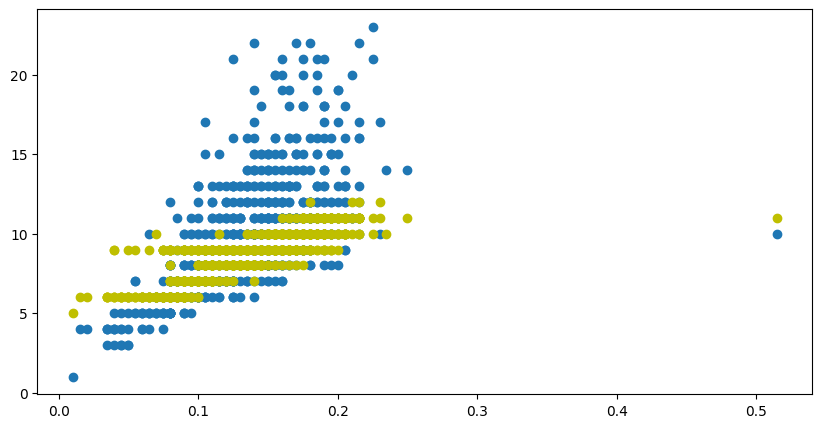

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()



```
# 코드로 형식 지정됨
```

KNN Classifiaction

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [39]:
print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- KNN Classifier ---
0.23923444976076555
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 12  5  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6 22 15  2  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 19 25 18  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 15 40 31  7  2  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 14 33 41 26 10  3  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7 22 31 27 21  9  4  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 16 31 18 22  6  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7 11 11  8  2  3  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  8 10 12  5  2  1  3  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  6  7  3  0  3  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  6  7  3  1  0  1  1  0  0  0  0  0 

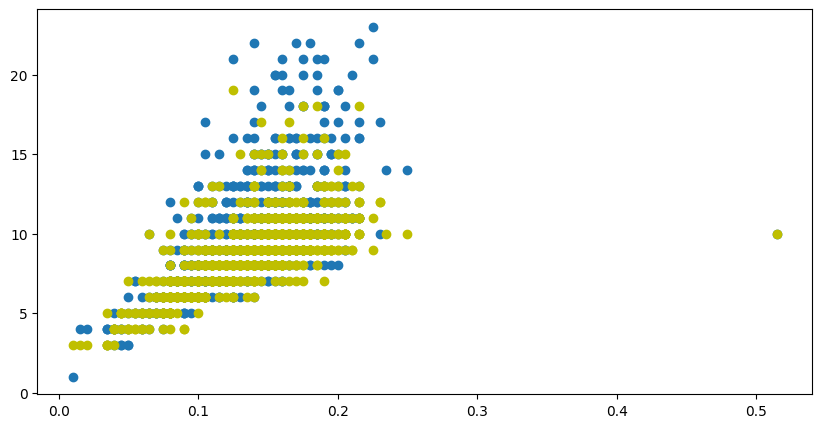

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

Deep Learning

RIng이 어떤 기준이 정해지지 않은 분류 데이터가 아니기 때문에 그룹화 하는 과정이 필요할 거 같다.... 따라서 Loss 가 이상하게 나온다.

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

input_dim=x_train.shape[1]
print(input_dim)
model=keras.Sequential([
    layers.Dense(12, activation="relu", input_shape=(input_dim,)),
    layers.Dense(12,activation="relu"),
    layers.Dense(12,activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                132       
                                                                 
 dense_7 (Dense)             (None, 12)                156       
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 1)                 13        
                                                                 
Total params: 457 (1.79 KB)
Trainable params: 457 (1.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [53]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [54]:
history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
105/105 [==============================] - 3s 10ms/step - loss: -32979170.0000 - accuracy: 0.0000e+00 - val_loss: -33747816.0000 - val_accuracy: 0.0012
Epoch 2/30
105/105 [==============================] - 0s 4ms/step - loss: -35295552.0000 - accuracy: 0.0000e+00 - val_loss: -36118152.0000 - val_accuracy: 0.0012
Epoch 3/30
105/105 [==============================] - 0s 3ms/step - loss: -37780144.0000 - accuracy: 0.0000e+00 - val_loss: -38672208.0000 - val_accuracy: 0.0012
Epoch 4/30
105/105 [==============================] - 0s 3ms/step - loss: -40453804.0000 - accuracy: 0.0000e+00 - val_loss: -41411800.0000 - val_accuracy: 0.0012
Epoch 5/30
105/105 [==============================] - 0s 4ms/step - loss: -43330456.0000 - accuracy: 0.0000e+00 - val_loss: -44363500.0000 - val_accuracy: 0.0012
Epoch 6/30
105/105 [==============================] - 0s 3ms/step - loss: -46425964.0000 - accuracy: 0.0000e+00 - val_loss: -47538500.0000 - val_accuracy: 0.0012
Epoch 7/30
105/105 [=======

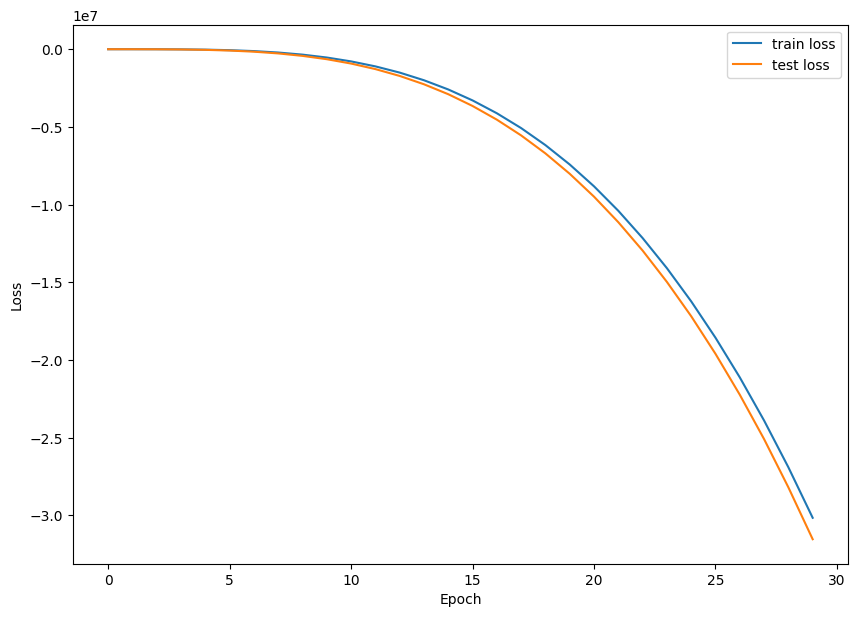

In [50]:
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.evaluate(x_test, y_test)


27/27 [==============================] - 0s 3ms/step - loss: -31526352.0000 - accuracy: 0.0012


[-31526352.0, 0.0011961722047999501]